In [4]:
import numpy as np
import matplotlib.pyplot as plt

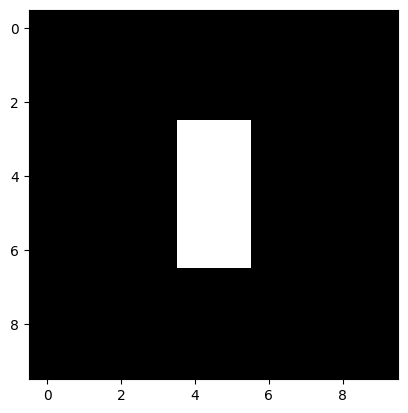

In [5]:
grid = np.zeros((10, 10), dtype=int)
grid[3:7, 4:6] = 1
plt.imshow(grid, cmap='gray', interpolation='none')


In [13]:
m00 = np.sum(grid)
m10 = np.sum(grid * np.arange(grid.shape[1]))  # Moment with respect to x-coordinates
m01 = np.sum(grid * np.arange(grid.shape[0])[:, np.newaxis])  # Moment with respect to y-coordinates

m00, m10, m01

cx = m10 / m00
cy = m01 / m00


x_indices = np.arange(grid.shape[1]) - cx
y_indices = np.arange(grid.shape[0]) - cy

x_indices, y_indices

(array([0. , 1. , 2. , 3. , 3.5, 4.5, 6. , 7. , 8. , 9. ]),
 array([0.  , 1.  , 2.  , 2.75, 3.75, 4.75, 5.75, 7.  , 8.  , 9.  ]))